# Import Required Library

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# Read CSV

In [4]:
# read train dataset
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Descriptive Statistics of Data

In [3]:
df.describe(include='all')  # if you want descriptive statistics to include categorical data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df.describe()  # only for numeric data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Check for Missing Values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It can be seen that the variables sex, cabin, and embarked contain missing values.

# Pie Chart of Missing Values

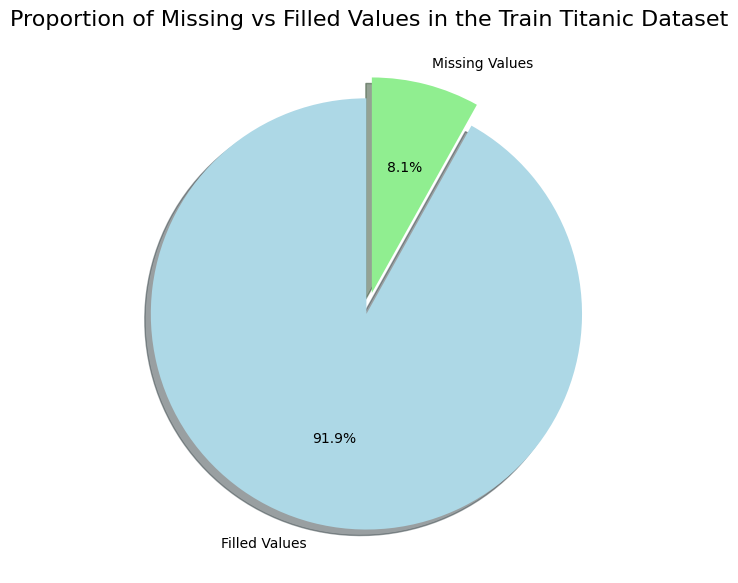

In [14]:
# Calculate total missing values and filled values in the dataset
total_values = df.size
missing_values_total = df.isnull().sum().sum()
filled_values_total = total_values - missing_values_total

# Explode values to create a "split" effect in the pie chart
explode = (0.05, 0.05)  # Slightly explode both sections

# Visualize the Pie Chart with the exploded effect
plt.figure(figsize=(7, 7))
plt.pie([filled_values_total, missing_values_total], 
        labels=['Filled Values', 'Missing Values'], 
        colors=['lightblue', 'lightgreen'], 
        autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)

plt.title('Proportion of Missing vs Filled Values in the Train Titanic Dataset', fontsize=16)
plt.show()

# EDA (Exploratory Data Analysis)

EDA (Exploratory Data Analysis)
Visualizing data to gain better insights into patterns and relationships among features in the dataset.

# Visualization of Survived Distribution
This chart helps to visualize the comparison of the number of passengers who survived.

Survived = 1  
Not Survived = 0

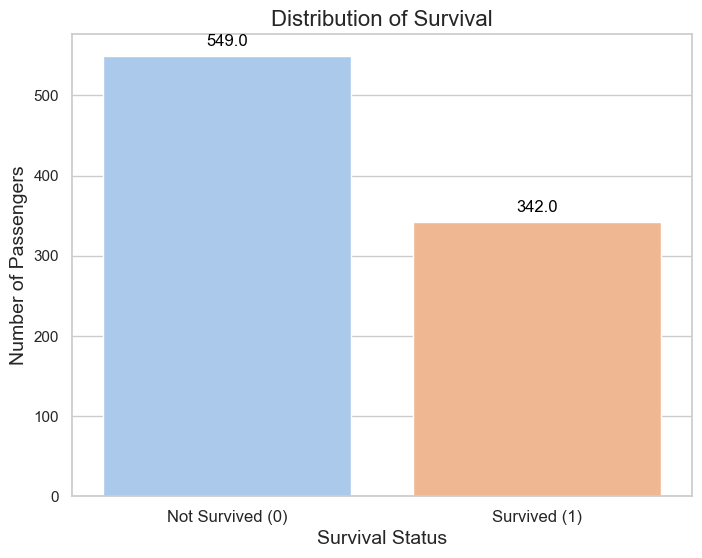

In [18]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the count plot with a custom color palette
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Survived', palette='pastel')

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5),  # Offset text
                textcoords='offset points')

# Title and labels
plt.title('Distribution of Survival', fontsize=16)
plt.xlabel('Survival Status', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Not Survived (0)', 'Survived (1)'], fontsize=12)
plt.ylabel('Number of Passengers', fontsize=14)

# Show the plot
plt.show()

Based on the graph above, it can be seen that in the training data, the number of passengers who did not survive is greater than those who survived.

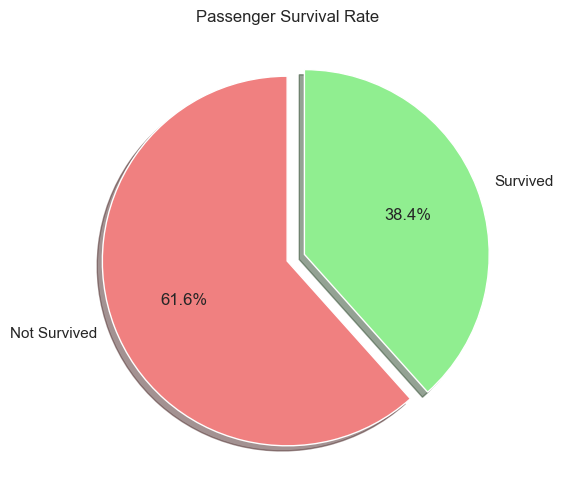

In [23]:
# Count the number of passengers who survived (1) and did not survive (0)
survived_counts = df['Survived'].value_counts()

# Create a pie chart with specified colors and shadow
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, 
        labels=['Not Survived', 'Survived'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightcoral', 'lightgreen'],  # Soft red and soft green colors
        explode=[0, 0.1],  # Slightly explode the 'Survived' slice
        shadow=True)  # Add shadow effect
plt.title('Passenger Survival Rate')
plt.show()

# Visualization of Ticket Class (Pclass)
The Pclass variable represents the ticket class of passengers on the Titanic, categorized into three distinct classes: 1st Class, 2nd Class, and 3rd Class. 

This visualization will help us understand the distribution of passengers across these classes, shedding light on how class may have influenced survival rates and passenger demographics. Let's dive into the data and explore the proportions of each ticket class visually!


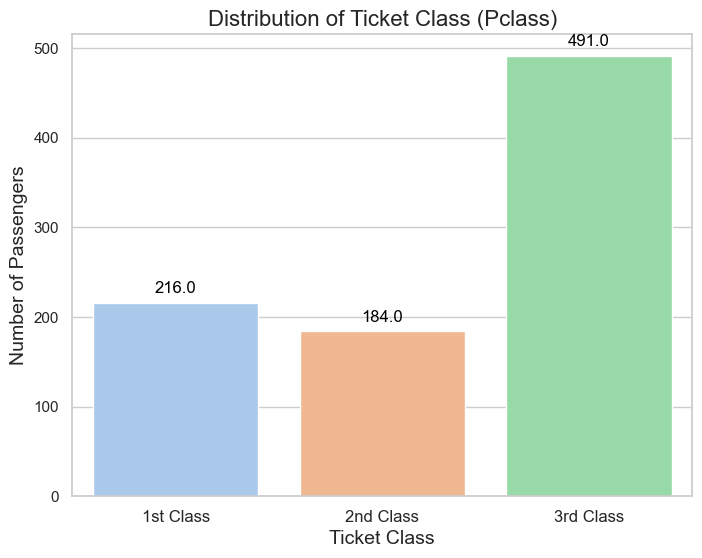

In [25]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a count plot for Pclass
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Pclass', palette='pastel')

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5),  # Offset text slightly above the bar
                textcoords='offset points')

# Title and labels
plt.title('Distribution of Ticket Class (Pclass)', fontsize=16)
plt.xlabel('Ticket Class', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)

# Show the plot
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'], fontsize=12)
plt.show()

Based on the graph above, the highest number of passengers used 3rd class tickets.

# Visualization of Gender Distribution (Sex)
The 'Sex' variable indicates the gender of Titanic passengers: male and female. This visualization helps us understand the proportion of each gender and its impact on survival rates.

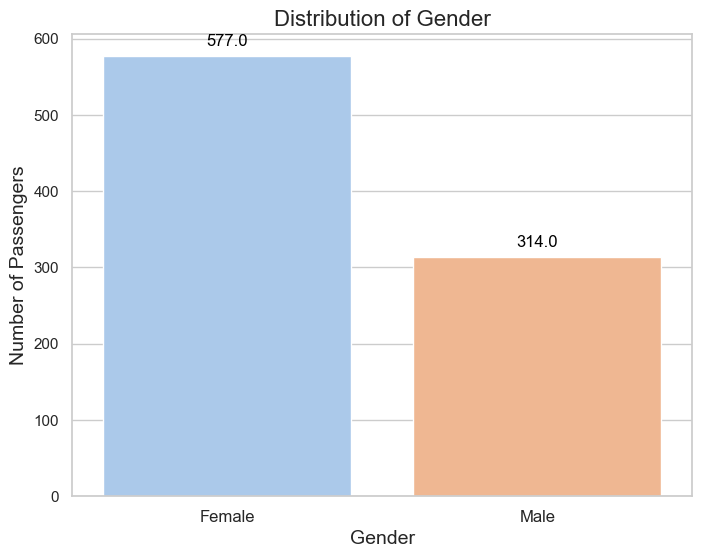

In [27]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a count plot for Sex
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Sex', palette='pastel')

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5),  # Offset text slightly above the bar
                textcoords='offset points')

# Title and labels
plt.title('Distribution of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)

# Show the plot
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=12)
plt.show()

The graph shows that in this training data, there are significantly more female passengers (577) than male passengers (314).

# Visualization of Age
The age visualization of the Titanic data shows the distribution of passengers' ages in the Titanic training dataset.

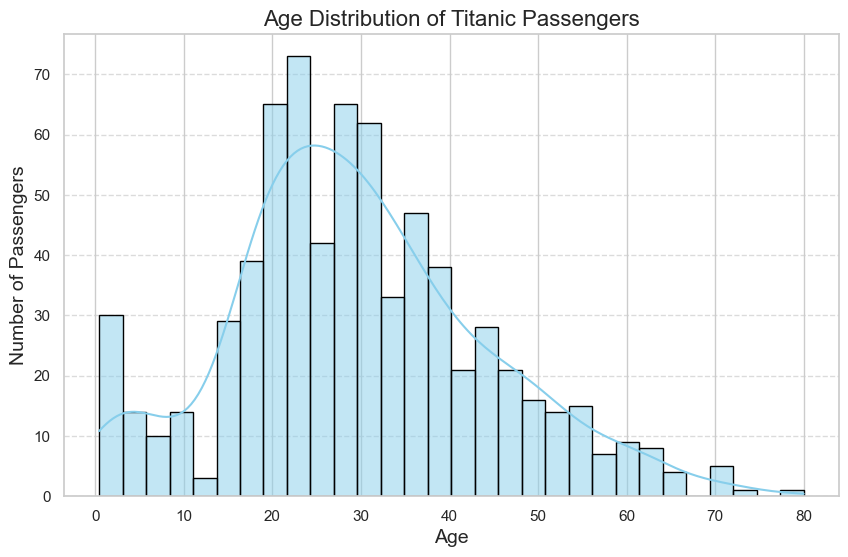

In [28]:
# Set the style and color palette
sns.set(style="whitegrid")

# Create the histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Age Distribution of Titanic Passengers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# Visualization of Fare

This visualization shows the distribution of fares paid by Titanic passengers in the dataset. The graph illustrates the varying range of fares, reflecting the differences in ticket classes and travel experiences.

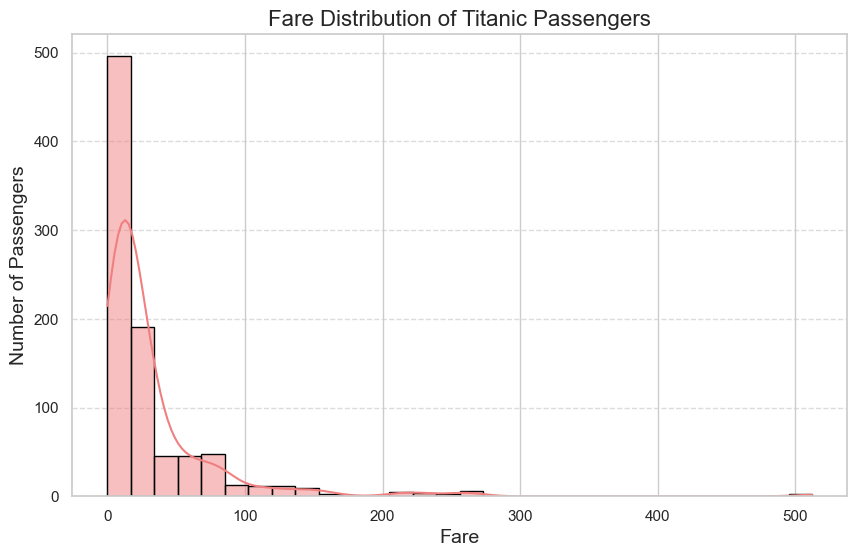

In [31]:
# Set the style and color palette
sns.set(style="whitegrid")

# Create the histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True, color='lightcoral', edgecolor='black')

# Add titles and labels
plt.title('Fare Distribution of Titanic Passengers', fontsize=16)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# Visualization of Survival by Age Group

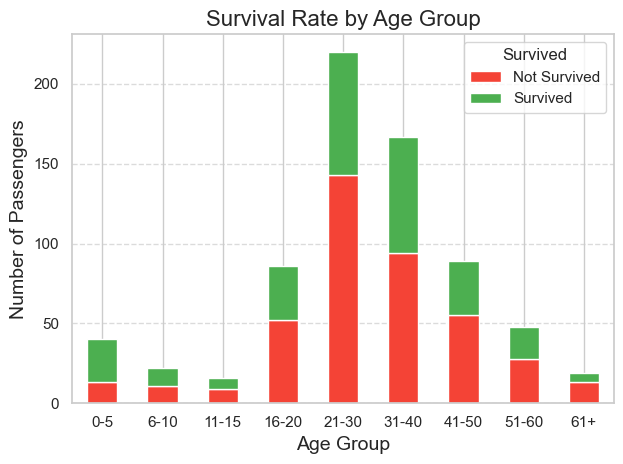

In [36]:
# Grouping ages into age ranges
bins = [0, 5, 10, 15, 20, 30, 40, 50, 60, 70]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Counting the number of survivors and non-survivors based on age group
age_survival = df.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

# Visualizing using a bar plot with more appealing colors
age_survival.plot(kind='bar', stacked=True, color=['#F44336', '#4CAF50'])  # Green for Survived, Red for Not Survived
plt.title("Survival Rate by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Number of Passengers", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()

#### Observations:

The 21-30 age group has the highest number of passengers, with more passengers not surviving than surviving.

The 31-40 age group also has a significant number of passengers, exhibiting a similar pattern of more non-survivors than survivors.

Younger age groups (0-5 and 6-10) have fewer passengers, but they exhibit a higher proportion of survivors.

The 61+ age group has the fewest passengers, and similarly, more passengers in this group did not survive.

# Visualization of Correlation Dataset
This heatmap illustrates the correlation between various variables in the Titanic dataset. 

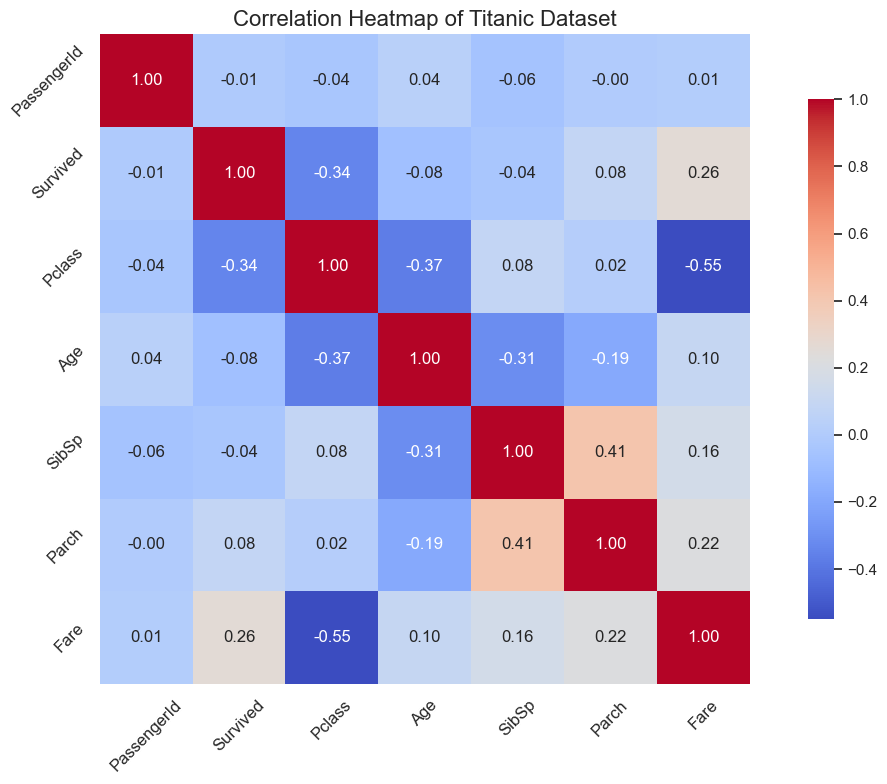

In [32]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Heatmap of Titanic Dataset', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Correlation Analysis: Pclass, Fare, and Survived

Correlation between Pclass and Fare:

There is a negative correlation between Pclass and Fare. This means that as the Pclass value decreases (e.g., Pclass 1 compared to Pclass 3), the ticket cost (Fare) increases. This indicates that passengers in higher classes (first class) pay more for better facilities and services.
Feature Most Positively Influencing Survived:

Fare is the feature that most positively influences survival (Survived). Passengers who paid higher fares tend to have a greater likelihood of survival. This is likely due to first-class passengers having better access to lifeboats and other safety facilities.
Feature Most Negatively Influencing Survived:

Pclass is the feature that most negatively influences survival. As the Pclass number increases, the class becomes lower. Passengers in third class are more likely to not survive because they are located on lower decks with limited access to lifeboats, increasing their risk during the tragedy.

# Data Preprocessing
This preprocessing step is intended to improve or clean the data.

Based on the missing values, there are three categories with missing values: Age, Cabin, and Embarked.

## Fill Missing Values in the Age Column with the Median
Missing values in the Age column are replaced with the median, assuming the median is unknown. The reason for using the median is to avoid being influenced by outliers or skewed data distribution.

In [37]:
df['Age'] = df['Age'].fillna(df['Age'].median())

## Fill Missing Values in the Embarked Column with the Mode
The Embarked column does not use the median because it is categorical (S, C, Q) rather than numerical. Therefore, the Embarked column uses the mode, which can be obtained with mode()[0].

In [38]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop the Cabin Column Due to Excessive Missing Values

The Cabin category has a significant number of missing values, so this category is dropped using the function drop(axis=1) (to remove a column) or drop(axis=0) (to remove a row).

In [39]:
df = df.drop('Cabin', axis=1)

# Check the Results After Preprocessing
The data after preprocessing.

In [40]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
AgeGroup       184
dtype: int64

# Feature Engineering


# Convert Categorical Features to Numeric
Machine learning models cannot work directly with text data, so we need to convert categorical features (such as Sex and Embarked) into numeric values.

_Label Encoding is used to transform categorical data into numeric format_

In [42]:
# Creating an Instance of LabelEncoder
le = LabelEncoder()

# Converting the 'Sex' Column to Numeric
df['Sex'] = le.fit_transform(df['Sex'])

# Converting the 'Embarked' Column to Numeric
df['Embarked'] = le.fit_transform(df['Embarked'])

In [43]:
# show
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,31-40
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,31-40
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,31-40


# Feature Selection
Feature selection involves choosing the most relevant features to use in the model to enhance its performance.

In [44]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]  # Feature dataset
y = df['Survived']  # Target column

In [47]:
X # pX: Feature dataset (independent variables)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [58]:
y # y: Target variable (dependent variable)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Feature Scaling
Feature scaling involves adjusting the scale of numerical features to ensure that all features contribute equally to the model's performance.

Why only 'Age' and 'Fare' need scaling? The values of Age and Fare have significantly different ranges (for example, Age can vary from 0 to 80 years, while Fare can range from 0 to over 500). In contrast, the other features are categorical and only require encoding. Scaling ensures that these numerical features do not disproportionately influence the model due to their varying magnitudes.

In [50]:
# Creating an instance of StandardScaler
scaler = StandardScaler()

# Scaling the numerical features
# Only 'Age' and 'Fare' need scaling
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

# Displaying the results after scaling
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.565736,1,0,-0.502445,2
1,1,0,0.663861,1,0,0.786845,0
2,3,0,-0.258337,0,0,-0.488854,2
3,1,0,0.433312,1,0,0.420730,2
4,3,1,0.433312,0,0,-0.486337,2


# Splitting Data
This step involves dividing the dataset into a training set and a testing set. The training set is used to train the model, while the testing set is reserved for evaluating the model's performance on unseen data.



In [52]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling
## Random Forest
This step involves building a classification model using the Random Forest algorithm. Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [75]:
# Creating the Random Forest model
model_rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Training the model with the training data
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In this code, we create an instance of the RandomForestClassifier, specifying n_estimators=50 to indicate that the model will use 50 decision trees in the ensemble. The random_state=42 parameter is used to ensure that the results are reproducible. After that, we train the model using the training data (X_train and y_train).

## Predict Test

In [76]:
y_pred = model_rf.predict(X_test)

## Evaluating the Random Forest Model
This step involves evaluating the performance of the model using metrics such as confusion matrix, accuracy, precision, recall, and F1-Score. These metrics provide insights into how well the model is performing and its effectiveness in predicting the outcomes.

In [61]:
# Printing the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[91 14]
 [18 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### Values Interpretation

- **True Positive (TP)**: 56  
  This indicates that 56 passengers who survived were correctly predicted as survivors.

- **True Negative (TN)**: 91  
  This shows that 91 passengers who did not survive were correctly predicted as not surviving.

- **False Positive (FP)**: 14  
  This means that 14 passengers who did not survive were incorrectly predicted as survivors (Type I error).

- **False Negative (FN)**: 18  
  This indicates that 18 passengers who survived were incorrectly predicted as not surviving (Type II error).

### Summary

- The model has a good accuracy of approximately **82%**, indicating that it correctly predicts about 82 out of 100 instances.
- For class **0** (not survived):
  - **Precision**: **0.83** – When the model predicts a passenger will not survive, it is correct 83% of the time.
  - **Recall**: **0.87** – The model correctly identifies about 87% of the actual non-survivors.
  - **F1-Score**: **0.85** – This reflects a balance between precision and recall for non-survivors.
- For class **1** (survived):
  - **Precision**: **0.80** – When the model predicts a passenger will survive, it is correct 80% of the time.
  - **Recall**: **0.76** – The model correctly identifies about 76% of the actual survivors.
  - **F1-Score**: **0.78** – This reflects a balance between precision and recall for survivors.
- The **macro average** precision is **0.82**, recall is **0.81**, and F1-score is **0.81**.
- The **weighted average** precision is **0.82**, recall is **0.82**, and F1-score is **0.82**.


## Visualisasi Confusion Matrix

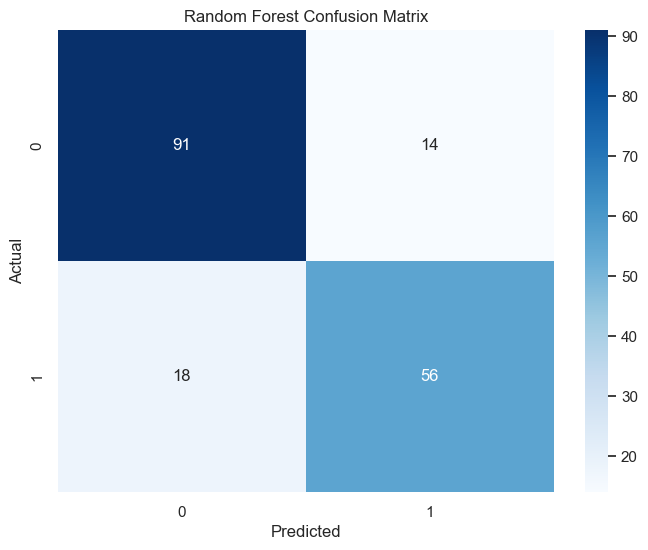

In [64]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# K-Nearest Neighbors (KNN)

In [66]:
# Creating the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)

# Training the model with the training data
model_knn.fit(X_train, y_train)

# Making predictions on the test data
y_pred_knn = model_knn.predict(X_test)

# Evaluating the KNN model
from sklearn.metrics import confusion_matrix, classification_report

# Printing the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Confusion Matrix:
[[86 19]
 [17 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       105
           1       0.75      0.77      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Confusion Matrix and Classification Report for KNN Model

#### Confusion Matrix:
- **True Positive (TP)**: 57  
  This indicates that 57 passengers who survived were correctly predicted as survivors.

- **True Negative (TN)**: 86  
  This shows that 86 passengers who did not survive were correctly predicted as not surviving.

- **False Positive (FP)**: 19  
  This means that 19 passengers who did not survive were incorrectly predicted as survivors (Type I error).

- **False Negative (FN)**: 17  
  This indicates that 17 passengers who survived were incorrectly predicted as not surviving (Type II error).


### Summary of Results:
- **Accuracy**: The model has an accuracy of approximately **80%**, indicating that it correctly predicts about 80 out of 100 instances.
  
- **Precision**: The precision for predicting non-survivors (class 0) is **83%**, which means that when the model predicts a passenger will not survive, it is correct 83% of the time. For survivors (class 1), the precision is **75%**.

- **Recall**: The recall for non-survivors is **82%**, indicating that the model correctly identifies about 82% of the actual non-survivors. The recall for survivors is **77%**, meaning it identifies about 77% of actual survivors.

- **F1-Score**: The F1-score for non-survivors is **83%**, while for survivors, it is **76%**. The F1-score is a balance between precision and recall, providing a single metric to assess the model's performance.

- **Average Metrics**: The macro average and weighted average for precision, recall, and F1-score are around **79%** to **80%**, indicating a balanced performance across both classes.

### Conclusion:
The KNN model performs reasonably well with an accuracy of **80%**, showing a good balance between precision and recall. However, there's room for improvement, especially in increasing the recall and precision for the survivor class (class 1).



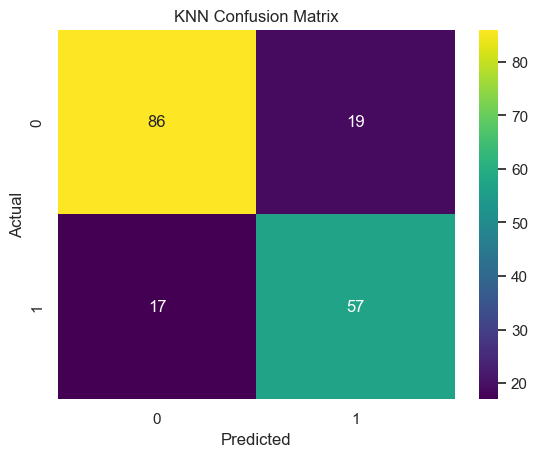

In [68]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

# Support Vector Machine (SVM)

In [72]:
# Creating the SVM model
model_svm = SVC(random_state=42)

# Training the model with the training data
model_svm.fit(X_train, y_train)

# Making predictions on the test data
y_pred_svm = model_svm.predict(X_test)

# Evaluating the SVM model
from sklearn.metrics import confusion_matrix, classification_report

# Printing the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Confusion Matrix:
[[92 13]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



### Confusion Matrix and Classification Report for SVM Model

#### Confusion Matrix:
- **True Positive (TP)**: 54  
  This indicates that 54 passengers who survived were correctly predicted as survivors.

- **True Negative (TN)**: 92  
  This shows that 92 passengers who did not survive were correctly predicted as not surviving.

- **False Positive (FP)**: 13  
  This means that 13 passengers who did not survive were incorrectly predicted as survivors (Type I error).

- **False Negative (FN)**: 20  
  This indicates that 20 passengers who survived were incorrectly predicted as not surviving (Type II error).


### Summary of Results:
- **Accuracy**: The model has an accuracy of approximately **82%**, indicating that it correctly predicts about 82 out of 100 instances.

- **Precision**: The precision for predicting non-survivors (class 0) is **82%**, meaning that when the model predicts a passenger will not survive, it is correct 82% of the time. For survivors (class 1), the precision is **81%**.

- **Recall**: The recall for non-survivors is **88%**, indicating that the model correctly identifies about 88% of the actual non-survivors. The recall for survivors is **73%**, meaning it identifies about 73% of actual survivors.

- **F1-Score**: The F1-score for non-survivors is **85%**, while for survivors, it is **77%**. The F1-score is a balance between precision and recall, providing a single metric to assess the model's performance.

- **Average Metrics**: The macro average and weighted average for precision, recall, and F1-score are around **81%**, indicating a balanced performance across both classes.

### Conclusion:
The SVM model performs reasonably well with an accuracy of **82%**, showing a good balance between precision and recall. However, there is room for improvement, especially in increasing the recall for the survivor class (class 1).



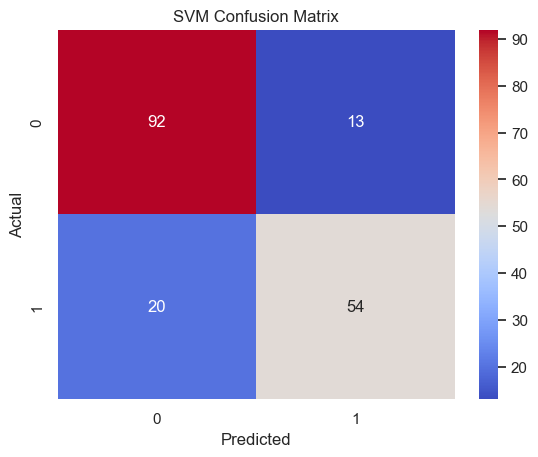

In [71]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Comapring Accuracy

In [84]:
# Make predictions
y_pred_rf_train = model_rf.predict(X_train)
y_pred_rf_test = model_rf.predict(X_test)

y_pred_svm_train = model_svm.predict(X_train)
y_pred_svm_test = model_svm.predict(X_test)

y_pred_knn_train = model_knn.predict(X_train)
y_pred_knn_test = model_knn.predict(X_test)

# Calculate accuracies
train_accuracy_rf = accuracy_score(y_train, y_pred_rf_train)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf_test)

train_accuracy_svm = accuracy_score(y_train, y_pred_svm_train)
test_accuracy_svm = accuracy_score(y_test, y_pred_svm_test)

train_accuracy_knn = accuracy_score(y_train, y_pred_knn_train)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn_test)

# Create a DataFrame for accuracy comparison
data = {
    'Model': ['Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors'],
    'Training Accuracy': [train_accuracy_rf, train_accuracy_svm, train_accuracy_knn],
    'Testing Accuracy': [test_accuracy_rf, test_accuracy_svm, test_accuracy_knn]
}

# Create a DataFrame
accuracy_df = pd.DataFrame(data)
accuracy_df

,Model,Training Accuracy,Testing Accuracy
0,Random Forest,0.978933,0.821229
1,Support Vector Machine,0.834270,0.815642
2,K-Nearest Neighbors,0.852528,0.798883


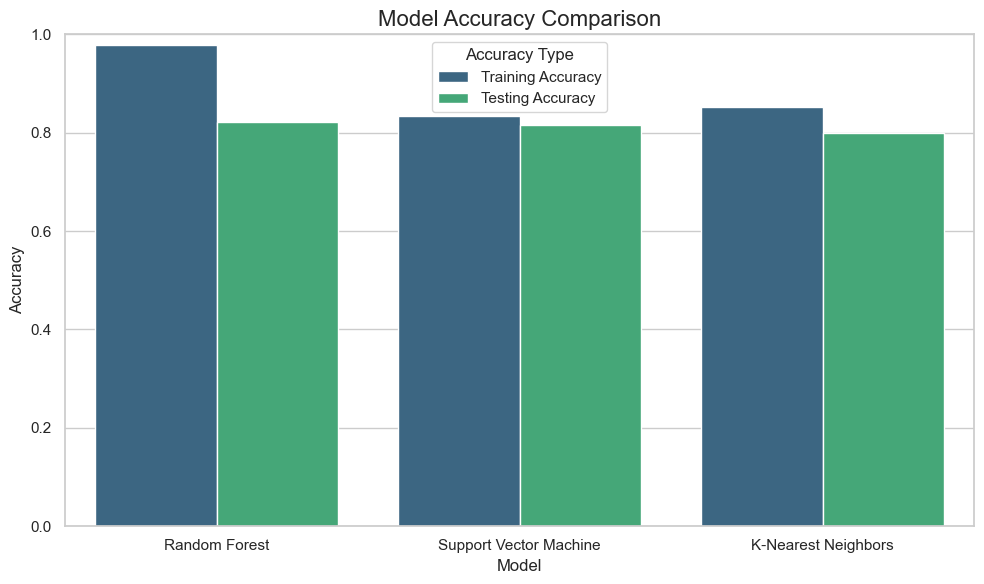

In [85]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Melt the accuracy DataFrame for easier plotting
accuracy_melted = accuracy_df.melt(id_vars='Model', var_name='Accuracy Type', value_name='Accuracy')

# Create a bar plot
sns.barplot(data=accuracy_melted, x='Model', y='Accuracy', hue='Accuracy Type', palette='viridis')

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)  # Set y-axis limits to show accuracy between 0 and 1
plt.legend(title='Accuracy Type')

# Show the plot
plt.tight_layout()
plt.show()